## CS6460 data analysis

### 1. Data preparation and summary stats

In [273]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats
import statsmodels.api as sm
import seaborn as sns
import sklearn.preprocessing as sp
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from subprocess import check_output

%matplotlib inline

In [274]:
#ingest raw mixed numerical and categorical data produced by AMT study
data = pd.read_csv("data_categorical.csv")
#list data types
data.dtypes

Code      object
answer    object
scale      int64
why       object
dtype: object

In [275]:
data.shape

(132, 4)

In [276]:
# drop "why" column since this will be dealt with separately using NLP
data = data.drop(['why'], axis=1)

In [277]:
data

,Code,answer,scale
0,causal,Text,5
1,causal,Charts,5
2,causal,Text,4
3,causal,Text,4
4,causal,Images,4
...,...,...,...
127,example,Text,4
128,example,Text,5
129,example,Text,5
130,example,Text,3


### Display data

In [281]:
df = data.pivot_table(values='scale', index=['Code', 'answer'], columns=['Code'], aggfunc='sum', fill_value=0)
df

Code                causal  contrastive  example
Code        answer                              
causal      Charts      53            0        0
            Images      46            0        0
            Text        73            0        0
contrastive Charts       0           32        0
            Images       0           54        0
            Text         0          127        0
example     Charts       0            0       32
            Images       0            0       41
            Text         0            0       79

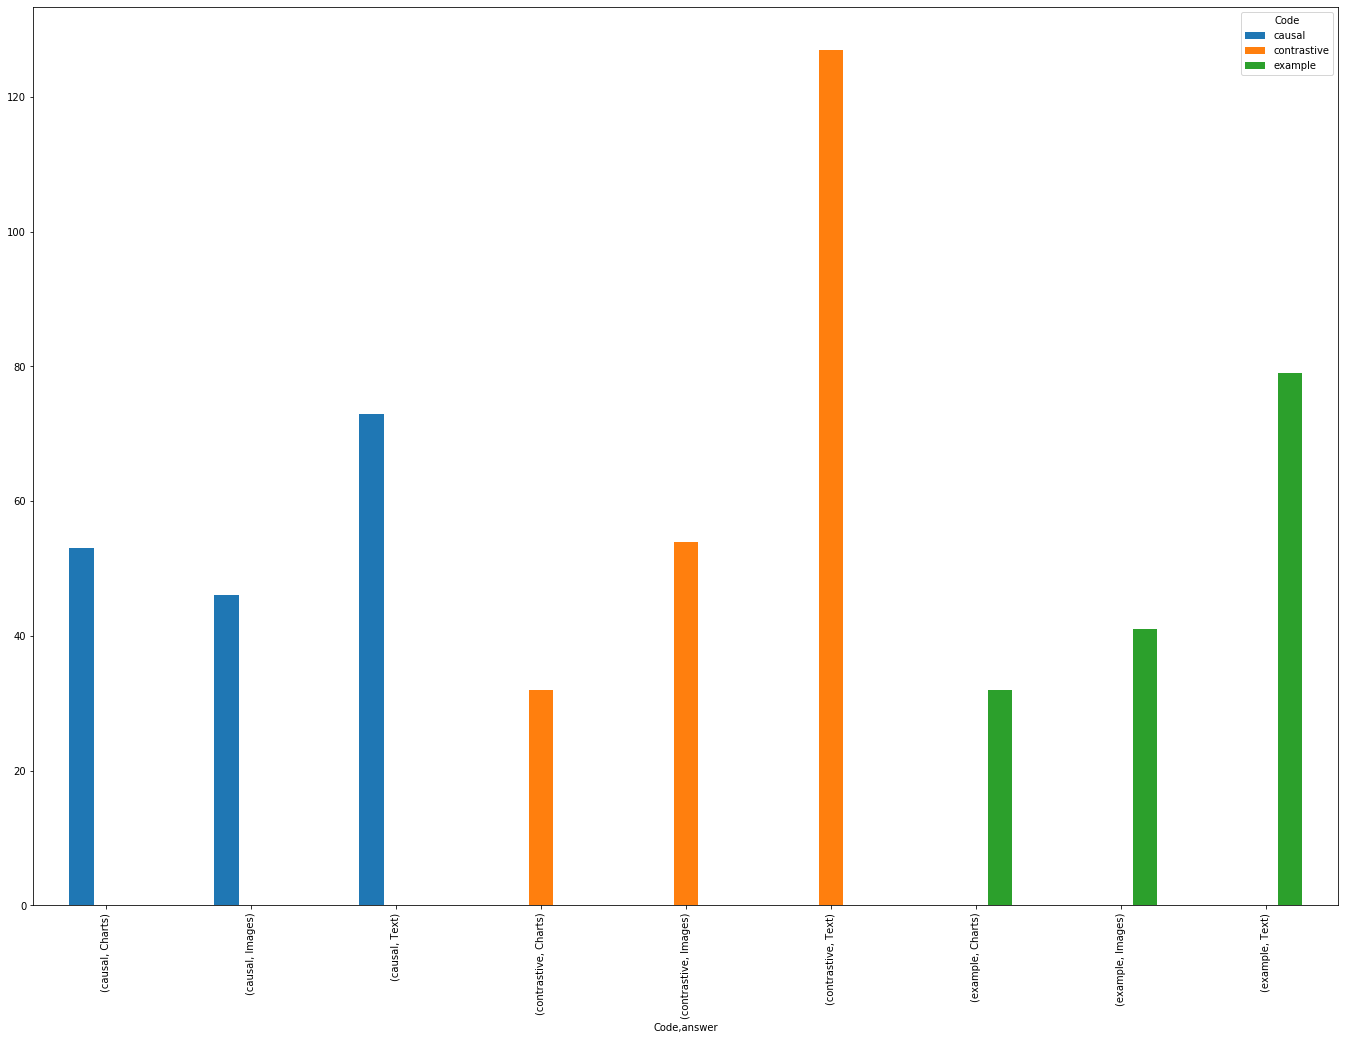

In [279]:
df.plot(kind = 'bar', figsize=(23.39, 16.53))

### 4. Chi Square

In [284]:
# Import the function
from scipy.stats import chi2_contingency#Testing the relationship

chi_res = chi2_contingency(pd.crosstab(df['causal'], df['contrastive']))
print('Chi2 Statistic: {}, p-value: {}'.format(chi_res[0], chi_res[1]))

Chi2 Statistic: 2.25, p-value: 0.9868693843419859


In [ ]:
chi2_check = []
for i in categorical_columns:
    if chi2_contingency(pd.crosstab(loan['Loan_Status'], loan[i]))[1] < 0.05:
        chi2_check.append('Reject Null Hypothesis')
    else:
        chi2_check.append('Fail to Reject Null Hypothesis')res = pd.DataFrame(data = [categorical_columns, chi2_check] 
             ).T 
res.columns = ['Column', 'Hypothesis']
print(res)